In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

### Data Reading / Initial Cleaning

In [ ]:
start_date = '2015-01-01'
end_date = '2024-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='M')

windows = []

for start in date_range:
    end = start + pd.DateOffset(months=5)
    if end <= pd.to_datetime(end_date):
        windows.append([start, end])

windows_df = pd.DataFrame(windows, columns=['Start', 'End'])

windows_df['Window'] = windows_df.apply(lambda row: f"[{row['Start']}, {row['End']}]", axis=1)

windows_df


<ipython-input-2-c772dbbd3d6d>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


,Start,End,Window
0,2015-01-31,2015-06-30,"[2015-01-31 00:00:00, 2015-06-30 00:00:00]"
1,2015-02-28,2015-07-28,"[2015-02-28 00:00:00, 2015-07-28 00:00:00]"
2,2015-03-31,2015-08-31,"[2015-03-31 00:00:00, 2015-08-31 00:00:00]"
3,2015-04-30,2015-09-30,"[2015-04-30 00:00:00, 2015-09-30 00:00:00]"
4,2015-05-31,2015-10-31,"[2015-05-31 00:00:00, 2015-10-31 00:00:00]"
...,...,...,...
110,2024-03-31,2024-08-31,"[2024-03-31 00:00:00, 2024-08-31 00:00:00]"
111,2024-04-30,2024-09-30,"[2024-04-30 00:00:00, 2024-09-30 00:00:00]"
112,2024-05-31,2024-10-31,"[2024-05-31 00:00:00, 2024-10-31 00:00:00]"
113,2024-06-30,2024-11-30,"[2024-06-30 00:00:00, 2024-11-30 00:00:00]"


In [ ]:
BuildingPermits = pd.read_csv("/content/drive/MyDrive/Data Capstone/BuildingPermits.csv")
DemolitionPermits = pd.read_csv("/content/drive/MyDrive/Data Capstone/DemolitionPermits.csv")
CrimeIncidents = pd.read_csv("/content/drive/MyDrive/Data Capstone/CrimeIncidents.csv")


<ipython-input-3-a80e0f069692>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
<ipython-input-3-a80e0f069692>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
print(BuildingPermits.columns.tolist())
print(DemolitionPermits.columns.tolist())
print(CrimeIncidents.columns.tolist())

['ObjectId', 'PERMIT_ID', 'PRIMARY_ADDRESS', 'PERMIT_TYPE', 'PERMIT_SUBTYPE', 'PERMIT_CATEGORY', 'JOB_DESCRIPTION', 'USE_GROUP_1', 'PLAN_TYPE', 'WORK_DESCRIPTION', 'CONTRACTOR', 'JOB_VALUE', 'FILE_DATE', 'ISSUE_DATE', 'APP_STATUS', 'CURRENT_TASK', 'CURRENT_TASK_STATUS', 'PARCEL_NUMBER', 'WARD', 'WORK_AREA', 'SIZE_OF_BUILDING', 'BLDG_FOOTPRINT', 'DW_Parcel', 'DW_Ward', 'DW_Tract2020', 'DW_Neighborhood']
['ObjectId', 'PERMIT_ID', 'PERMIT_TYPE', 'PERMIT_SUBTYPE', 'PRIMARY_ADDRESS', 'PRIMARY_PARCEL', 'FILE_DATE', 'ISSUED_DATE', 'CLOSED_DATE', 'Contrator_Business_Name', 'Job_Value', 'DW_Parcel', 'DW_Ward', 'DW_Tract2020', 'DW_Neighborhood']
['OBJECTID', 'PrimaryKey', 'CaseNumber', 'District', 'UCRdesc', 'OffenseYear', 'TimeGroup', 'ReportedDate', 'OffenseMonth', 'OffenseDay', 'TimeBlock', 'DOWname', 'DOW', 'HourofDay', 'DaysAgo', 'OffenseDate', 'Statute', 'Zip', 'StatDesc', 'Address_Public', 'std_parcelpin', 'WARD', 'City', 'CENSUS_TRACT', 'CENSUS_TRACT_GEOID', 'CENSUS_BLOCK_GROUP', 'CENSUS

In [ ]:
BuildingPermits = BuildingPermits.drop(columns=["ObjectId", "PERMIT_ID", "CONTRACTOR", "PLAN_TYPE", "PARCEL_NUMBER", "WARD", "WORK_AREA", "SIZE_OF_BUILDING", "BLDG_FOOTPRINT", "DW_Parcel", "DW_Ward", "DW_Neighborhood", "APP_STATUS", "CURRENT_TASK", "CURRENT_TASK_STATUS"])

In [ ]:
DemolitionPermits = DemolitionPermits.drop(columns=["ObjectId", "PERMIT_ID", "PRIMARY_PARCEL", "Contrator_Business_Name", "DW_Parcel", "DW_Ward", "DW_Neighborhood"])

In [ ]:
CrimeIncidents = CrimeIncidents.drop(columns=["OBJECTID", "PrimaryKey", "CaseNumber", "District", "CENSUS_BLOCK_GROUP", "CENSUS_BG_GEOID", "CENSUS_BLOCK", "CENSUS_BLOCK_GEOID", "LAT", "LON", "x", "y", "Statute", "Zip", "WARD", "City", "Address_Public", "std_parcelpin", "OffenseDay", "TimeBlock", "DOWname", "DOW", "HourofDay", "DaysAgo", "StatDesc", "TimeGroup", "ReportedDate"])

### Crime Incidents Cleaning

In [ ]:
violent_keywords = ["Assault", "Robbery", "Fel Assault", "Arson", "Weapons", "Sex Offenses", "Rape", "Offense Against Family/Children", "Homicide"]
vice_keywords = ["Drug Abuse Violations", "Liquor Laws", "Driving Under The Influence", "Prostitution", "Drunkenness", "Gambling"]

def classify_crime(description):
    for word in violent_keywords:
        if word in description:
            return "Violent"
    for word in vice_keywords:
        if word in description:
            return "Vice"
    return "Nonviolent"

CrimeIncidents["CrimeType"] = CrimeIncidents["UCRdesc"].apply(classify_crime)

In [ ]:
CrimeIncidents.rename(columns={'CENSUS_TRACT_GEOID': 'DW_Tract2020'}, inplace=True)

In [ ]:
CrimeIncidents = CrimeIncidents[CrimeIncidents['OffenseYear'] >= 2015]


In [ ]:
CrimeIncidents.head()

,UCRdesc,OffenseYear,OffenseMonth,OffenseDate,CENSUS_TRACT,DW_Tract2020,CrimeType,YearMonth
0,Assault,2016,1,2016-01-17 23:00:00,Census Tract 1275.01,39035127501,Violent,2016-01
1,Theft,2015,12,2015-12-31 05:01:00,Census Tract 1235.01,39035123501,Nonviolent,2015-12
2,Forgery & Counterfeiting,2015,12,2015-12-31 05:01:00,Census Tract 1235.01,39035123501,Nonviolent,2015-12
3,All Other Offenses,2016,1,2016-01-18 14:55:00,Census Tract 1242.01,39035124201,Nonviolent,2016-01
4,GTMV,2016,1,2016-01-18 05:30:00,Census Tract 1166,39035116600,Nonviolent,2016-01


In [ ]:
CrimeIncidents['YearMonth'] = CrimeIncidents['OffenseDate'].dt.to_period('M')
crime_summary = CrimeIncidents.groupby(['DW_Tract2020', 'YearMonth', 'CrimeType']).size().unstack(fill_value=0)
crime_summary['Total'] = crime_summary.sum(axis=1)
crime_summary = crime_summary.reset_index()

crime_summary.head(50)

CrimeType,DW_Tract2020,YearMonth,Nonviolent,Vice,Violent,Total
0,39035101101,2015-07,0,0,1,1
1,39035101101,2016-01,13,1,12,26
2,39035101101,2016-02,18,2,14,34
3,39035101101,2016-03,16,0,7,23
4,39035101101,2016-04,12,2,11,25
5,39035101101,2016-05,21,1,12,34
6,39035101101,2016-06,17,1,10,28
7,39035101101,2016-07,16,1,11,28
8,39035101101,2016-08,19,3,9,31
9,39035101101,2016-09,13,0,10,23


In [ ]:
CrimeIncidents.head()

,UCRdesc,OffenseYear,OffenseMonth,OffenseDate,CENSUS_TRACT,DW_Tract2020,CrimeType
0,Assault,2016,1,2016-01-17 23:00:00,Census Tract 1275.01,39035127501,Violent
1,Theft,2015,12,2015-12-31 05:01:00,Census Tract 1235.01,39035123501,Nonviolent
2,Forgery & Counterfeiting,2015,12,2015-12-31 05:01:00,Census Tract 1235.01,39035123501,Nonviolent
3,All Other Offenses,2016,1,2016-01-18 14:55:00,Census Tract 1242.01,39035124201,Nonviolent
4,GTMV,2016,1,2016-01-18 05:30:00,Census Tract 1166,39035116600,Nonviolent


In [ ]:
CrimeIncidents["6 Month Blocks"] = CrimeIncidents['OffenseYear'].astype(str) + ' Half ' + ((CrimeIncidents['OffenseMonth'] - 1) // 6 + 1).astype(str)

In [ ]:
CrimesGrouped = CrimeIncidents.groupby(['DW_Tract2020', '6 Month Blocks']).agg(
    Total_Crimes=('CrimeType', 'size'),
    Total_Violent_Crimes=('CrimeType', lambda x: (x == 'Violent').sum()),
    Total_Vice_Crimes=('CrimeType', lambda x: (x == 'Vice').sum()),
    Total_Nonviolent_Crimes=('CrimeType', lambda x: (x == 'Nonviolent').sum())
).reset_index()

In [ ]:
CrimesGrouped.sort_values(by='6 Month Blocks', inplace=True)
CrimesGrouped['Year'] = CrimesGrouped['6 Month Blocks'].str.split(' ').str[0].astype(int)
CrimesGrouped = CrimesGrouped[CrimesGrouped['Year'] >= 2015]
CrimesGrouped.drop(columns=['Year'], inplace=True)
CrimesGrouped.head(10)

,DW_Tract2020,6 Month Blocks,Total_Crimes,Total_Violent_Crimes,Total_Vice_Crimes,Total_Nonviolent_Crimes
1647,39035115900,2015 Half 1,2,1,0,1
511,39035103300,2015 Half 1,1,0,0,1
2829,39035121403,2015 Half 1,3,1,0,2
3224,39035123800,2015 Half 1,2,0,0,2
4979,39035980500,2015 Half 1,1,0,0,1
53,39035101201,2015 Half 1,1,0,0,1
4905,39035199200,2015 Half 1,1,1,0,0
1965,39035117300,2015 Half 1,2,1,0,1
2019,39035117500,2015 Half 1,3,1,0,2
190,39035101700,2015 Half 1,1,0,0,1


### Population Data Cleaning

In [ ]:
CensusPop = pd.read_csv("/content/drive/MyDrive/Data Capstone/CensusData.csv")
CensusPop = CensusPop[['Geographic Identifier - FIPS Code', 'Total Population']]
CensusPopChange = pd.read_csv("/content/drive/MyDrive/Data Capstone/Census2020.csv")
CensusPopChange = CensusPopChange[['GEOID10', 'Total Population Change']]

In [ ]:
CensusPop.rename(columns={'Geographic Identifier - FIPS Code': 'DW_Tract2020'}, inplace=True)
CensusPopChange.rename(columns={'GEOID10': 'DW_Tract2020'}, inplace=True)

In [ ]:
Pop = pd.merge(CensusPop, CensusPopChange, on='DW_Tract2020', how='inner')
Pop["ChangePerYear"] = Pop["Total Population Change"]/10
Pop.head()

,DW_Tract2020,Total Population,Total Population Change,ChangePerYear
0,39035101101,2072,-97,-9.7
1,39035101102,4298,117,11.7
2,39035101300,1652,9,0.9
3,39035101400,1711,16,1.6
4,39035101501,2021,159,15.9


In [ ]:
Pop_sorted = Pop
Pop_sorted = Pop_sorted.sort_values(by='Total Population', ascending = False)

Pop_sorted.head()

,DW_Tract2020,Total Population,Total Population Change,ChangePerYear
124,39035124100,5789,368,36.8
75,39035117700,5370,-163,-16.3
44,39035108701,4987,156,15.6
107,39035121700,4899,-154,-15.4
39,39035107701,4679,3580,358.0


In [ ]:
time_periods = [f"{year} Half {half}" for year in range(2015, 2025) for half in [1, 2]]

new_rows = []

for tract in Pop['DW_Tract2020'].unique():
    for period in time_periods:
        new_row = {
            'DW_Tract2020': tract,
            'Total Population': 2072,
            'Total Population Change': -97,
            'ChangePerYear': -9.70,
            'Year Half': period
        }
        new_rows.append(new_row)

Pop1 = pd.DataFrame(new_rows)
Pop1.rename(columns={'Year Half': '6 Month Blocks'}, inplace=True)

In [ ]:
Pop1.head()

,DW_Tract2020,Total Population,Total Population Change,ChangePerYear,6 Month Blocks
0,39035101101,2072,-97,-9.7,2015 Half 1
1,39035101101,2072,-97,-9.7,2015 Half 2
2,39035101101,2072,-97,-9.7,2016 Half 1
3,39035101101,2072,-97,-9.7,2016 Half 2
4,39035101101,2072,-97,-9.7,2017 Half 1


In [ ]:
years = Pop1["6 Month Blocks"].astype(str).str[:4].astype(float)
Pop1['Year'] = years

Pop1["Population"] = Pop1.apply(
    lambda row: row["Total Population"] +
                 (row["ChangePerYear"] * abs(row["Year"] - 2020))
                 if row["Year"] != 2020 else row["Total Population"],
    axis=1
)

In [ ]:
Population = Pop1[["DW_Tract2020", "6 Month Blocks", "Population"]]
Population.head()

,DW_Tract2020,6 Month Blocks,Population
0,39035101101,2015 Half 1,2023.5
1,39035101101,2015 Half 2,2023.5
2,39035101101,2016 Half 1,2033.2
3,39035101101,2016 Half 2,2033.2
4,39035101101,2017 Half 1,2042.9


In [ ]:
CrimesGrouped.head()

,DW_Tract2020,6 Month Blocks,Total_Crimes,Total_Violent_Crimes,Total_Vice_Crimes,Total_Nonviolent_Crimes
1647,39035115900,2015 Half 1,2,1,0,1
511,39035103300,2015 Half 1,1,0,0,1
2829,39035121403,2015 Half 1,3,1,0,2
3224,39035123800,2015 Half 1,2,0,0,2
4979,39035980500,2015 Half 1,1,0,0,1


### Getting Crime Statistics

In [ ]:
Population['DW_Tract2020'] = Population['DW_Tract2020'].astype(str)
CrimesGrouped = pd.merge(CrimesGrouped, Population, on=['DW_Tract2020', '6 Month Blocks'], how='inner')

<ipython-input-21-afcdf5773357>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
CrimesGrouped["Total_Crimes_Per_1000"] = (CrimesGrouped["Total_Crimes"] / CrimesGrouped["Population"]) * 1000
CrimesGrouped["Total_Violent_Crimes_Per_1000"] = (CrimesGrouped["Total_Violent_Crimes"] / CrimesGrouped["Population"]) * 1000
CrimesGrouped["Total_Vice_Crimes_Per_1000"] = (CrimesGrouped["Total_Vice_Crimes"] / CrimesGrouped["Population"]) * 1000
CrimesGrouped["Total_Nonviolent_Crimes_Per_1000"] = (CrimesGrouped["Total_Nonviolent_Crimes"] / CrimesGrouped["Population"]) * 1000

CrimesGrouped = CrimesGrouped.drop(columns=["Total_Crimes", "Total_Violent_Crimes", "Total_Vice_Crimes", "Total_Nonviolent_Crimes", "Population"])

CrimesGrouped.head()

,DW_Tract2020,6 Month Blocks,Total_Crimes_Per_1000,Total_Violent_Crimes_Per_1000,Total_Vice_Crimes_Per_1000,Total_Nonviolent_Crimes_Per_1000
0,39035115900,2015 Half 1,0.988386,0.494193,0.0,0.494193
1,39035103300,2015 Half 1,0.494193,0.000000,0.0,0.494193
2,39035121403,2015 Half 1,1.482580,0.494193,0.0,0.988386
3,39035123800,2015 Half 1,0.988386,0.000000,0.0,0.988386
4,39035980500,2015 Half 1,0.494193,0.000000,0.0,0.494193


### Cleaning Building Permits

In [ ]:
BuildingPermits = BuildingPermits[~BuildingPermits['PERMIT_CATEGORY'].isin(['Demolitions', 'Board-ups', 'Zoning - Signs',
       'Zoning - Fences', 'Zoning - Review', 'Zoning - Parking Lot License', 'Storm Water Run-off', 'Antenna'])]

In [ ]:
def categorize_permit_use(value):
    if pd.isna(value):
        return 'Unknown'
    elif value in ["One Family", "Two Family", "R-2 Residential - Permanent Housing - Shared Egress", "R-3 Townhouse Per RCO", "Three Family", "R-4 Residential - Assisted Living", "R-3 Residential - Permanent Housing - Independent Egress", "R-1 Residential - Transient Housing"]:
        return 'Housing'
    elif value.startswith(('A-3', 'A-4', 'A-1', 'A-5')):
        return 'Recreation'
    elif value.startswith('I-'):
        return 'Institutional Care'
    elif value.startswith('A-2'):
        return 'Food'
    elif value in ["B Business", "M Mercantile - Stores / Markets / Retail"]:
        return 'Businesses'
    elif value in ["E Educational"]:
        return 'Educational'
    elif value.startswith('S-'):
        return 'Storage'
    elif value.startswith('H-'):
        return 'Hazard'
    else:
        return 'Other'  # Catch-all for any other categories

In [ ]:
BuildingPermits["Use"] = BuildingPermits["USE_GROUP_1"].apply(categorize_permit_use)

In [ ]:
BuildingPermits['PERMIT_DATE'] = pd.to_datetime(BuildingPermits['ISSUE_DATE'])

BuildingPermits['6 Month Blocks'] = BuildingPermits['PERMIT_DATE'].dt.year.astype(str) + ' Half ' + ((BuildingPermits['PERMIT_DATE'].dt.month - 1) // 6 + 1).astype(str)

<ipython-input-26-4204d2d49f33>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [ ]:
def categorize_permit_category(value):
      if value in ['Electrical', 'Plumbing', 'Installation','HVAC and Refrigeration']:
        return "Maintenance"
      elif value in ["New"]:
        return "New"
      elif value in ["Repair or Alteration", 'Exterior Alterations', 'Additions', 'Interior Alterations']:
        return "Alteration"
      else:
        return "Other"

BuildingPermits["Permit Category"] = BuildingPermits["PERMIT_CATEGORY"].apply(categorize_permit_category)

In [ ]:
summary = BuildingPermits.groupby(['DW_Tract2020', '6 Month Blocks']).agg(
    Total_Permits=('Permit Category', 'size'),
    Total_Job_Value=('JOB_VALUE', 'sum'),
    New_Permits=('Permit Category', lambda x: (x == 'New').sum()),
    Maintenance_Permits=('Permit Category', lambda x: (x == 'Maintenance').sum()),
    Alteration_Permits=('Permit Category', lambda x: (x == 'Alteration').sum())
).reset_index()

In [ ]:
use_types = ['Housing', 'Unknown', 'Businesses', 'Other', 'Institutional Care', 'Food', 'Recreation', 'Storage', 'Educational', 'Hazard']

for use_type in use_types:
    counts = BuildingPermits[(BuildingPermits['Use'] == use_type)]
    counts_summary = counts.groupby(['DW_Tract2020', '6 Month Blocks']).size().reset_index(name=f'{use_type}_Permits')
    summary = summary.merge(counts_summary, on=['DW_Tract2020', '6 Month Blocks'], how='left')

summary.fillna(0, inplace=True)

In [ ]:
#use_types = ['Housing', 'Unknown', 'Businesses', 'Other', 'Institutional Care', 'Food', 'Recreation', 'Storage', 'Educational', 'Hazard']

#for use_type in use_types:
    #for permit_type in ['New', 'Maintenance', 'Alteration']:
        #counts = BuildingPermits[(BuildingPermits['Permit Category'] == permit_type) & (BuildingPermits['Use'] == use_type)]
        #counts_summary = counts.groupby(['DW_Tract2020', '6 Month Blocks']).size().reset_index(name=f'{use_type}_{permit_type}_Permits')

        # Merge counts back into summary
        #summary = summary.merge(counts_summary, on=['DW_Tract2020', '6 Month Blocks'], how='left')

#summary.fillna(0, inplace=True)

In [ ]:
#summary = summary.drop(columns=["Housing_Maintenance_Permits", "Businesses_Maintenance_Permits", "Other_Maintenance_Permits", "Institutional Care_Maintenance_Permits", "Institutional Care_Alteration_Permits", "Food_Maintenance_Permits", "Food_Alteration_Permits", "Recreation_Maintenance_Permits", "Recreation_Alteration_Permits", "Storage_Maintenance_Permits", "Educational_Maintenance_Permits", "Educational_Alteration_Permits", "Hazard_Maintenance_Permits", "Hazard_Alteration_Permits"])

In [ ]:
BuildingPermitsGrouped = summary
BuildingPermitsGrouped.rename(columns={'Total_Permits': 'Total_Building_Permits'}, inplace=True)
BuildingPermitsGrouped.rename(columns={'Total_Job_Value': 'Total_Building_Job_Value'}, inplace=True)
BuildingPermitsGrouped.sort_values(by='6 Month Blocks', inplace=True)
BuildingPermitsGrouped.head()

,DW_Tract2020,6 Month Blocks,Total_Building_Permits,Total_Building_Job_Value,New_Permits,Maintenance_Permits,Alteration_Permits,Housing_Permits,Unknown_Permits,Businesses_Permits,Other_Permits,Institutional Care_Permits,Food_Permits,Recreation_Permits,Storage_Permits,Educational_Permits,Hazard_Permits
0,3.903510e+10,2015 Half 1,13,51402.00,5,8,0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2455,3.903512e+10,2015 Half 1,96,6363880.63,52,44,0,35.0,44.0,4.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0
2435,3.903512e+10,2015 Half 1,40,285303.00,20,20,0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,3.903510e+10,2015 Half 1,62,558519.13,29,33,0,26.0,33.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2415,3.903512e+10,2015 Half 1,42,269320.00,25,17,0,23.0,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cleaning Demolition Permits

In [ ]:
DemolitionPermits.head()

,PERMIT_TYPE,PERMIT_SUBTYPE,PRIMARY_ADDRESS,FILE_DATE,ISSUED_DATE,CLOSED_DATE,Job_Value,DW_Tract2020
0,Building Permit,Residential,"7732 Dercum Rd, Cleveland, OH, 44105",9/21/2020 12:00:00 AM,10/23/2020 3:17:29 PM,12/30/2020 12:00:00 AM,8450.0,3.903512e+10
1,Building Permit,Residential,"12825 Longmead AVE, CLEVELAND, OH, 44135",10/9/2020 12:00:00 AM,10/22/2020 7:47:10 PM,11/18/2020 12:00:00 AM,8250.0,3.903512e+10
2,Building Permit,Residential,"4232 E 71 ST, CLEVELAND, OH, 44105",10/9/2020 12:00:00 AM,10/22/2020 7:45:17 PM,11/6/2020 12:00:00 AM,9500.0,3.903512e+10
3,Building Permit,Residential,"7804 New York Ave, Cleveland, OH, 44105",6/17/2021 12:00:00 AM,6/21/2021 6:48:52 PM,6/30/2021 12:00:00 AM,13889.0,3.903512e+10
4,Building Permit,Residential,"7306 Colgate AVE, CLEVELAND, OH, 44102",10/9/2020 12:00:00 AM,10/22/2020 7:43:14 PM,11/30/2020 12:00:00 AM,12500.0,3.903510e+10


In [ ]:
DemolitionPermits['PERMIT_DATE'] = pd.to_datetime(DemolitionPermits['ISSUED_DATE'])

DemolitionPermits['6 Month Blocks'] = DemolitionPermits['PERMIT_DATE'].dt.year.astype(str) + ' Half ' + ((DemolitionPermits['PERMIT_DATE'].dt.month - 1) // 6 + 1).astype(str)

<ipython-input-34-d8ade8901b23>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [ ]:
summary = DemolitionPermits.groupby(['DW_Tract2020', '6 Month Blocks']).agg(
    Total_Permits=('PERMIT_SUBTYPE', 'size'),
    Total_Job_Value=('Job_Value', 'sum'),
    Residential_Permits=('PERMIT_SUBTYPE', lambda x: (x == 'Residential').sum()),
    Commercial_Permits=('PERMIT_SUBTYPE', lambda x: (x == 'Commercial').sum())
).reset_index()

In [ ]:
DemolitionPermitsGrouped = summary
DemolitionPermitsGrouped.rename(columns={'Total_Permits': 'Total_Demolition_Permits'}, inplace=True)
DemolitionPermitsGrouped.rename(columns={'Total_Job_Value': 'Total_Demolition_Job_Value'}, inplace=True)
DemolitionPermitsGrouped.sort_values(by='6 Month Blocks', inplace=True)
DemolitionPermitsGrouped.head()

,DW_Tract2020,6 Month Blocks,Total_Demolition_Permits,Total_Demolition_Job_Value,Residential_Permits,Commercial_Permits
0,3.903510e+10,2015 Half 1,2,17916.0,2,0
232,3.903510e+10,2015 Half 1,1,16000.0,0,1
1514,3.903512e+10,2015 Half 1,2,1700.0,2,0
235,3.903510e+10,2015 Half 1,2,9275.0,2,0
1495,3.903512e+10,2015 Half 1,3,12930.0,3,0


### Merging Data Frames

In [ ]:
permits_merged = pd.merge(BuildingPermitsGrouped, DemolitionPermitsGrouped, on=['DW_Tract2020', '6 Month Blocks'], how='inner')
permits_merged["DW_Tract2020"] = permits_merged["DW_Tract2020"].astype(int)
permits_merged["DW_Tract2020"] = permits_merged["DW_Tract2020"].astype(str)

In [ ]:
permits_merged.head()

,DW_Tract2020,6 Month Blocks,Total_Building_Permits,Total_Building_Job_Value,New_Permits,Maintenance_Permits,Alteration_Permits,Housing_Permits,Unknown_Permits,Businesses_Permits,...,Institutional Care_Permits,Food_Permits,Recreation_Permits,Storage_Permits,Educational_Permits,Hazard_Permits,Total_Demolition_Permits,Total_Demolition_Job_Value,Residential_Permits,Commercial_Permits
0,39035101101,2015 Half 1,13,51402.00,5,8,0,5.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,17916.0,2,0
1,39035123602,2015 Half 1,40,285303.00,20,20,0,20.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,800.0,1,0
2,39035103500,2015 Half 1,62,558519.13,29,33,0,26.0,33.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2,9275.0,2,0
3,39035123601,2015 Half 1,42,269320.00,25,17,0,23.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,12500.0,1,0
4,39035103602,2015 Half 1,158,5617360.50,50,108,0,18.0,108.0,3.0,...,2.0,2.0,1.0,0.0,0.0,0.0,2,13800.0,2,0


In [ ]:
df = pd.merge(permits_merged, CrimesGrouped, on=['DW_Tract2020', '6 Month Blocks'], how='inner')

df.sort_values(by=['DW_Tract2020', '6 Month Blocks'], inplace=True)

In [ ]:
print(df.columns.to_list())

['DW_Tract2020', '6 Month Blocks', 'Total_Building_Permits', 'Total_Building_Job_Value', 'New_Permits', 'Maintenance_Permits', 'Alteration_Permits', 'Housing_Permits', 'Unknown_Permits', 'Businesses_Permits', 'Other_Permits', 'Institutional Care_Permits', 'Food_Permits', 'Recreation_Permits', 'Storage_Permits', 'Educational_Permits', 'Hazard_Permits', 'Total_Demolition_Permits', 'Total_Demolition_Job_Value', 'Residential_Permits', 'Commercial_Permits', 'Total_Crimes_Per_1000', 'Total_Violent_Crimes_Per_1000', 'Total_Vice_Crimes_Per_1000', 'Total_Nonviolent_Crimes_Per_1000']


In [ ]:
len(df["DW_Tract2020"].unique())

#133 Census Tracts

133

In [ ]:
len(df)

1699

In [ ]:
df.head()

,DW_Tract2020,6 Month Blocks,Total_Building_Permits,Total_Building_Job_Value,New_Permits,Maintenance_Permits,Alteration_Permits,Housing_Permits,Unknown_Permits,Businesses_Permits,...,Educational_Permits,Hazard_Permits,Total_Demolition_Permits,Total_Demolition_Job_Value,Residential_Permits,Commercial_Permits,Total_Crimes_Per_1000,Total_Violent_Crimes_Per_1000,Total_Vice_Crimes_Per_1000,Total_Nonviolent_Crimes_Per_1000
128,39035101101,2015 Half 2,10,69895.0,6,4,0,3.0,4.0,1.0,...,0.0,0.0,1,8290.0,1,0,0.494193,0.494193,0.000000,0.000000
247,39035101101,2016 Half 1,20,143098.0,9,11,0,7.0,11.0,1.0,...,0.0,0.0,2,16098.0,2,0,83.612040,32.461145,3.442849,47.708046
370,39035101101,2017 Half 1,38,370108.0,14,24,0,10.0,24.0,0.0,...,0.0,0.0,2,16150.0,2,0,89.578540,40.139018,3.916002,45.523520
844,39035101101,2019 Half 1,20,169922.0,12,8,0,7.0,8.0,0.0,...,0.0,0.0,4,25248.0,4,0,96.494205,28.608835,0.969791,66.915580
916,39035101101,2019 Half 2,34,236338.0,24,10,0,22.0,10.0,0.0,...,0.0,0.0,1,13000.0,1,0,103.767638,34.912476,5.333851,63.521311


### Explatory Analysis

In [ ]:
df.head()

,DW_Tract2020,6 Month Blocks,Total_Building_Permits,Total_Building_Job_Value,New_Permits,Maintenance_Permits,Alteration_Permits,Housing_Permits,Unknown_Permits,Businesses_Permits,...,Educational_Permits,Hazard_Permits,Total_Demolition_Permits,Total_Demolition_Job_Value,Residential_Permits,Commercial_Permits,Total_Crimes_Per_1000,Total_Violent_Crimes_Per_1000,Total_Vice_Crimes_Per_1000,Total_Nonviolent_Crimes_Per_1000
128,39035101101,2015 Half 2,10,69895.0,6,4,0,3.0,4.0,1.0,...,0.0,0.0,1,8290.0,1,0,0.494193,0.494193,0.000000,0.000000
247,39035101101,2016 Half 1,20,143098.0,9,11,0,7.0,11.0,1.0,...,0.0,0.0,2,16098.0,2,0,83.612040,32.461145,3.442849,47.708046
370,39035101101,2017 Half 1,38,370108.0,14,24,0,10.0,24.0,0.0,...,0.0,0.0,2,16150.0,2,0,89.578540,40.139018,3.916002,45.523520
844,39035101101,2019 Half 1,20,169922.0,12,8,0,7.0,8.0,0.0,...,0.0,0.0,4,25248.0,4,0,96.494205,28.608835,0.969791,66.915580
916,39035101101,2019 Half 2,34,236338.0,24,10,0,22.0,10.0,0.0,...,0.0,0.0,1,13000.0,1,0,103.767638,34.912476,5.333851,63.521311


<ipython-input-45-4e905bc5d152>:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


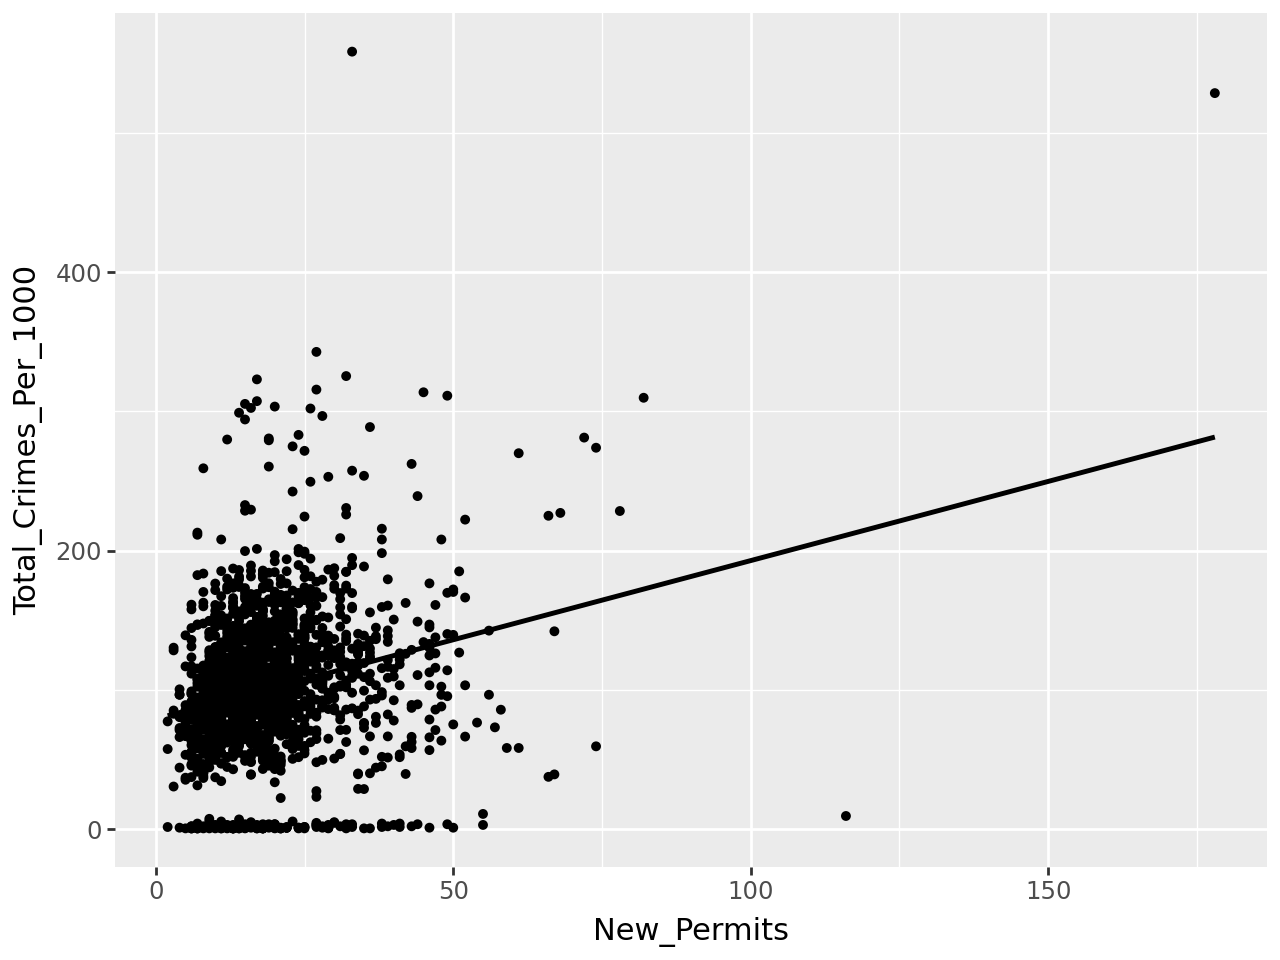

In [ ]:
plot1 = (
    ggplot(df, aes(x='New_Permits', y='Total_Crimes_Per_1000')) +
    geom_point(size=1) +
    geom_smooth(method='lm', se=False)
)
print(plot1)

<ipython-input-46-60673d92c3aa>:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


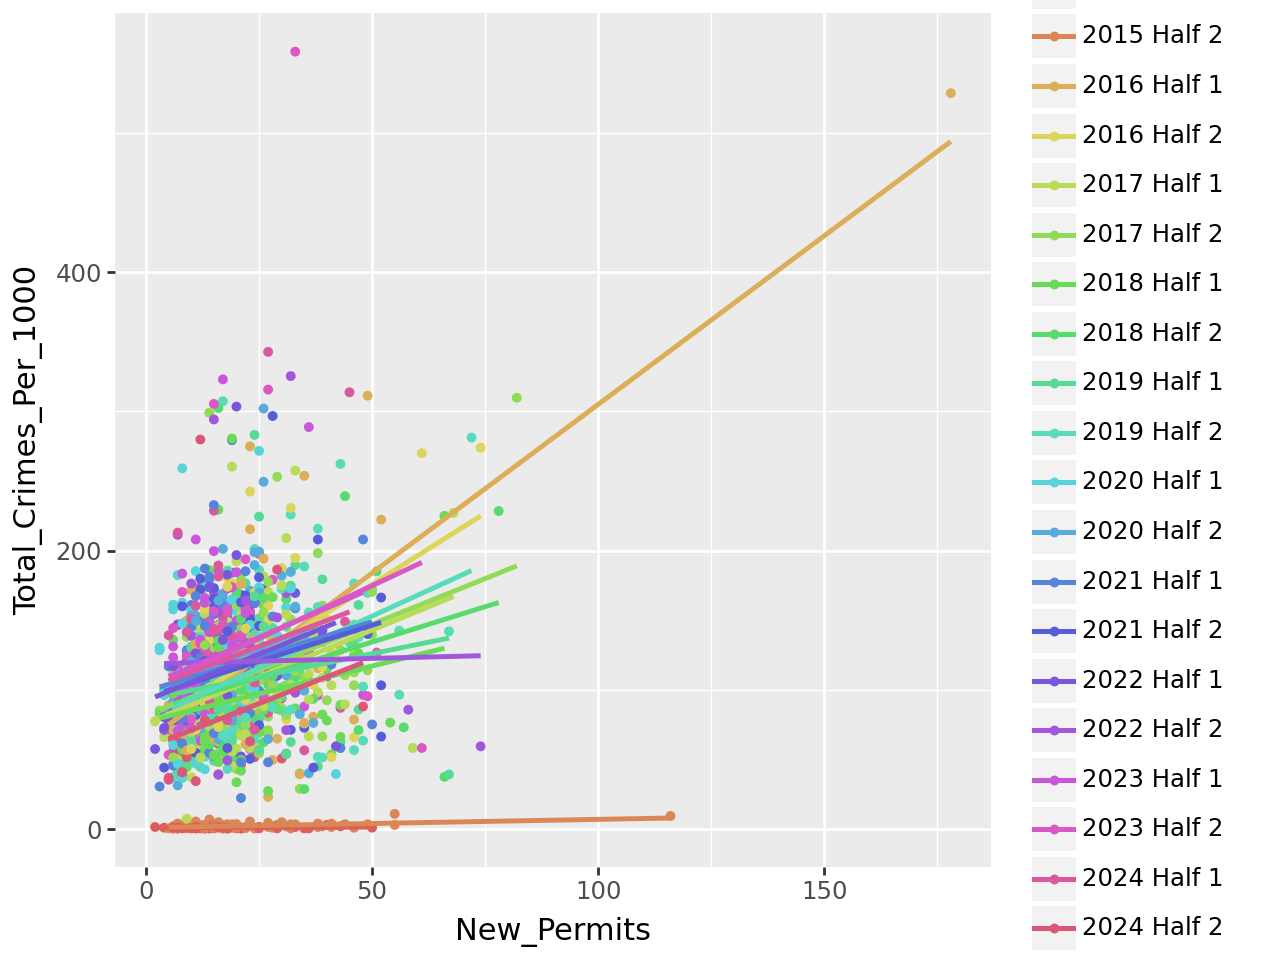

In [ ]:
plot12 = (
    ggplot(df, aes(x='New_Permits', y='Total_Crimes_Per_1000', color = "6 Month Blocks")) +
    geom_point(size=1) +
    geom_smooth(aes(group='6 Month Blocks'), method='lm', se=False)
)
print(plot12)

<ipython-input-47-10fab14baca7>:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


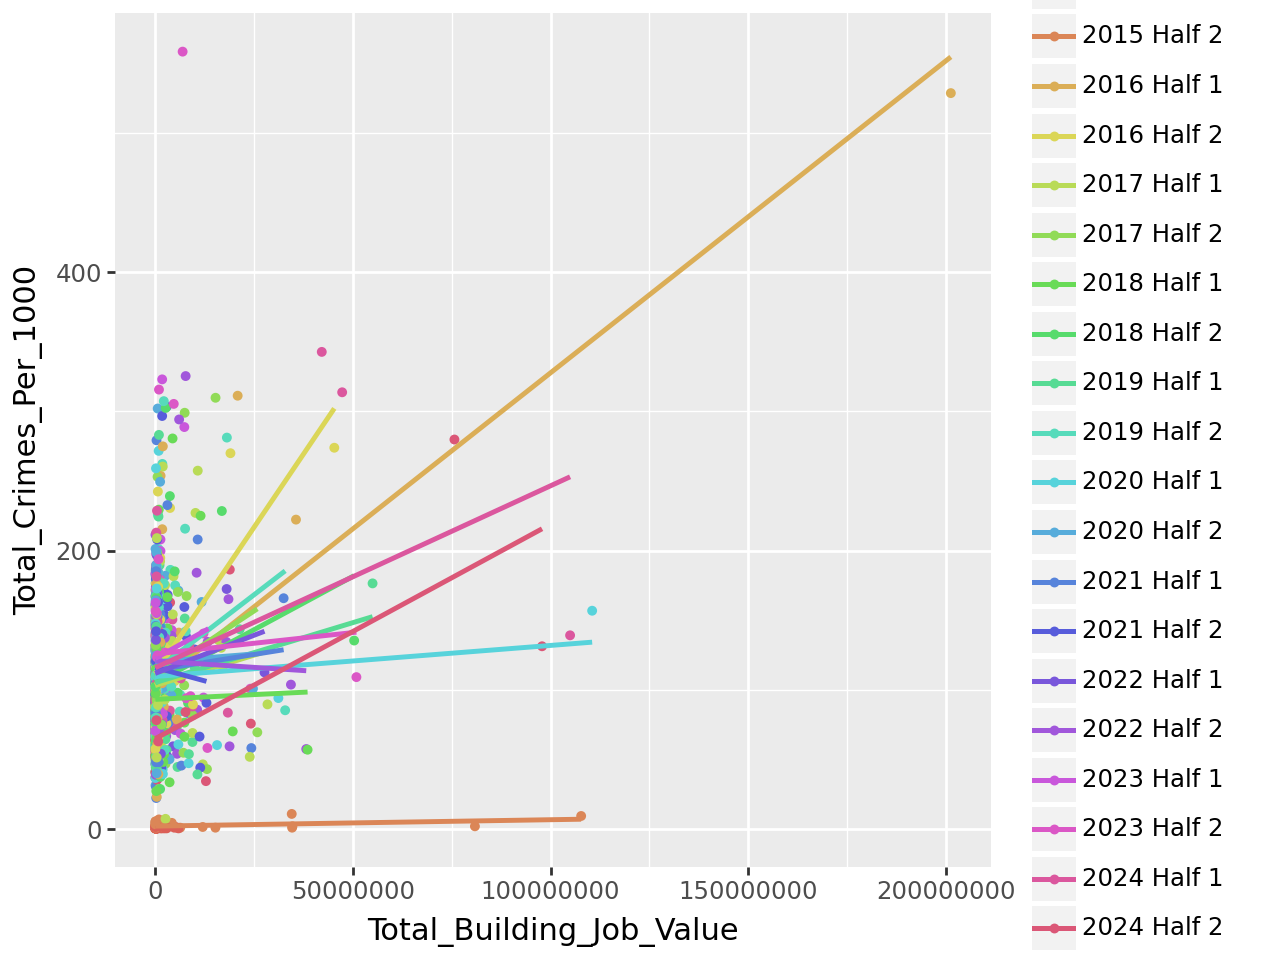

In [ ]:
plot2 = (
    ggplot(df, aes(x='Total_Building_Job_Value', y='Total_Crimes_Per_1000', color = '6 Month Blocks')) +
    geom_point(size=1) +
    geom_smooth(aes(group='6 Month Blocks'), method='lm', se=False)
)
print(plot2)

<ipython-input-48-5a0ae160c0b9>:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


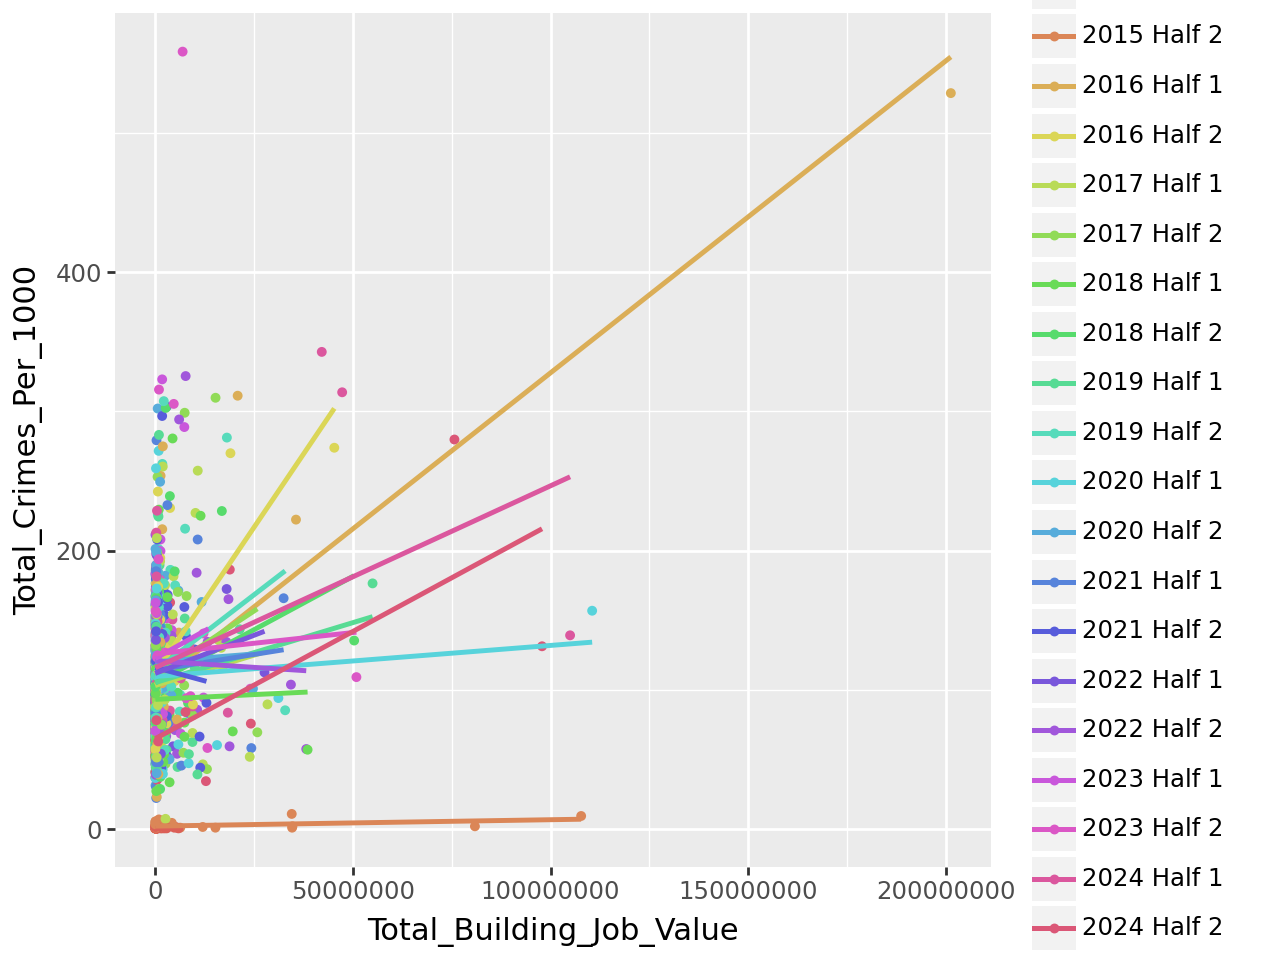

In [ ]:
plot22 = (
    ggplot(df, aes(x='Total_Building_Job_Value', y='Total_Crimes_Per_1000', color = '6 Month Blocks')) +
    geom_point(size=1) +
    geom_smooth(aes(group='6 Month Blocks'), method='lm', se=False)
)
print(plot22)

<ipython-input-49-30c48fd5ec96>:6: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


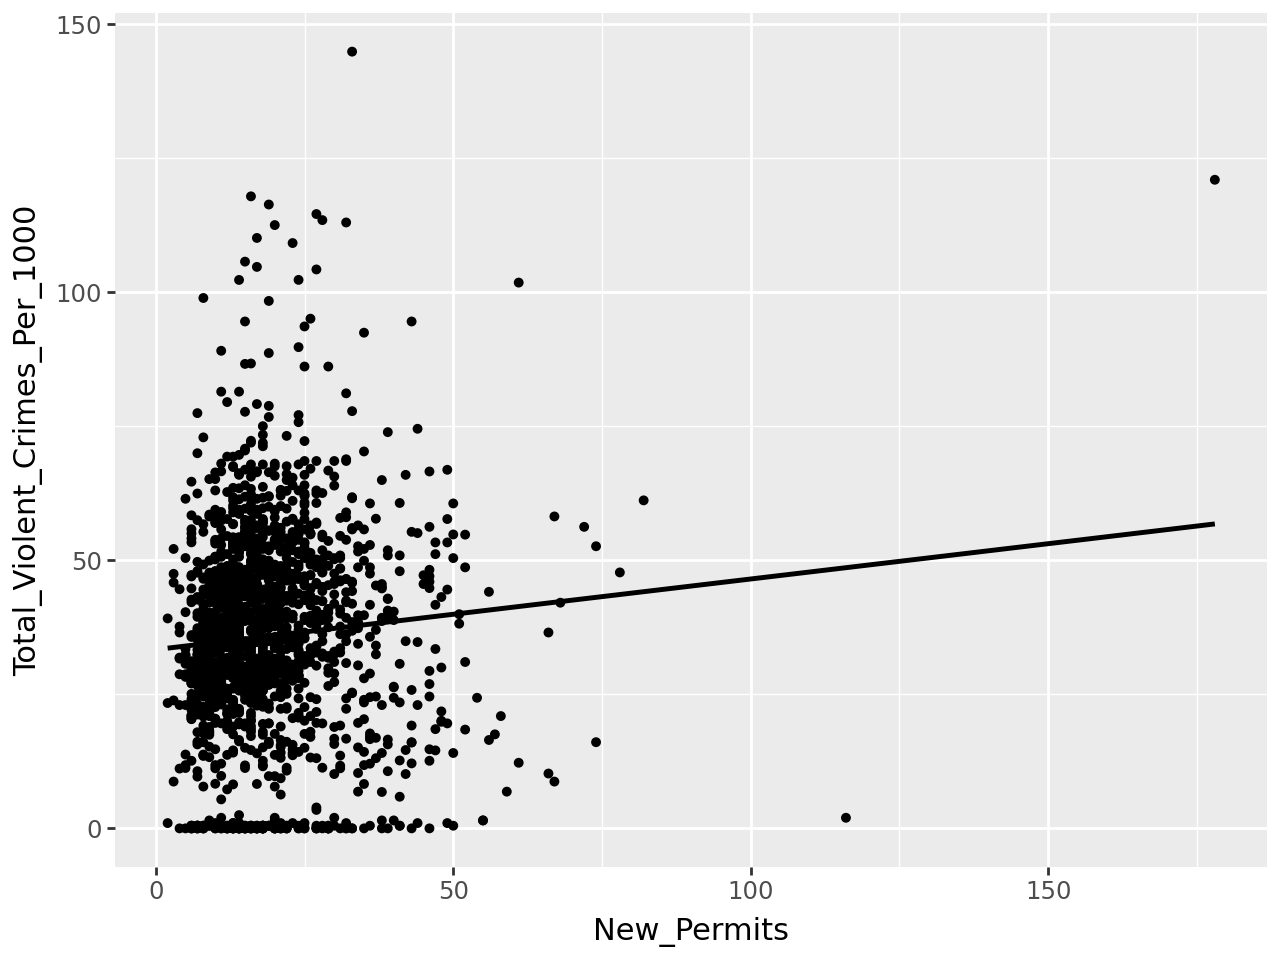

In [ ]:
plot3 = (
    ggplot(df, aes(x='New_Permits', y='Total_Violent_Crimes_Per_1000')) +
    geom_point(size=1) +
    geom_smooth(method='lm', se=False)
)
print(plot3)

In [ ]:
df[df["DW_Tract2020"] == "39035108701"]

,DW_Tract2020,6 Month Blocks,Total_Building_Permits,Total_Building_Job_Value,New_Permits,Maintenance_Permits,Alteration_Permits,Housing_Permits,Unknown_Permits,Businesses_Permits,...,Educational_Permits,Hazard_Permits,Total_Demolition_Permits,Total_Demolition_Job_Value,Residential_Permits,Commercial_Permits,Total_Crimes_Per_1000,Total_Violent_Crimes_Per_1000,Total_Vice_Crimes_Per_1000,Total_Nonviolent_Crimes_Per_1000
220,39035108701,2016 Half 1,67,1972146.98,23,44,0,8.0,44.0,1.0,...,2.0,0.0,2,39000.0,0,2,274.936061,109.187488,10.820382,154.928192
354,39035108701,2016 Half 2,140,19070239.00,61,79,0,50.0,79.0,2.0,...,1.0,0.0,1,7200.0,1,0,270.017706,101.809955,6.393862,161.813889
388,39035108701,2017 Half 1,249,1953109.00,19,230,0,1.0,230.0,3.0,...,0.0,0.0,1,4675.0,1,0,260.414117,98.389544,9.300504,152.724069
487,39035108701,2017 Half 2,341,7494517.00,14,327,0,4.0,327.0,0.0,...,1.0,0.0,1,178600.0,0,1,299.084635,102.305546,10.279505,186.499584
665,39035108701,2018 Half 1,290,4434721.00,19,271,0,2.0,271.0,5.0,...,1.0,0.0,1,59000.0,0,1,280.619702,88.668031,11.205301,180.746370
705,39035108701,2018 Half 2,107,2706098.16,16,91,0,7.0,91.0,2.0,...,0.0,0.0,3,42344.0,1,2,302.543116,117.899250,8.769366,175.874501
780,39035108701,2019 Half 1,49,987833.00,24,25,0,8.0,25.0,2.0,...,1.0,0.0,6,76225.0,3,3,283.178975,102.312952,8.243224,172.622800
948,39035108701,2019 Half 2,49,2218755.00,17,32,0,8.0,32.0,1.0,...,0.0,0.0,1,120000.0,0,1,307.423750,104.737429,10.182806,192.503515
987,39035108701,2020 Half 1,24,242999.00,8,16,0,7.0,16.0,1.0,...,0.0,0.0,1,10400.0,1,0,259.169884,98.938224,6.274131,153.957529
1209,39035108701,2021 Half 1,31,3133273.00,15,16,0,5.0,16.0,1.0,...,2.0,0.0,3,24040.0,3,0,232.749842,94.554623,10.667701,127.527518


In [ ]:
df.groupby('6 Month Blocks')[['Total_Building_Permits', 'Total_Crimes_Per_1000']].mean()

,Total_Building_Permits,Total_Crimes_Per_1000
6 Month Blocks,,
2015 Half 1,39.169014,1.099754
2015 Half 2,45.010204,2.274297
2016 Half 1,47.224299,110.515903
2016 Half 2,45.494505,117.516263
2017 Half 1,47.663462,104.903663
2017 Half 2,52.590000,112.428411
2018 Half 1,47.190000,93.364513
2018 Half 2,50.097826,107.096408
2019 Half 1,46.382353,106.710288
